In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [3]:
df = pd.read_csv('drive/MyDrive/data_cleaned.csv', 
                 parse_dates=['fecha'], 
                 dtype={
                'destino_ciudad_mercado': str,
                'procedencia_codigo_departamento': str,
                'procedencia_codigo_municipio': str,
                'procedencia_departamento'	: str,
                'procedencia_municipio'	: str,
                'grupo'	: str,
                'alimento': str,
                'destino_nombre_mercado': str,})

In [5]:
df.destino_ciudad_mercado.unique()

array(['Armenia, Mercar', 'Barranquilla, Barranquillita',
       'Barranquilla, Granabastos', 'Bogotá, D.C., Corabastos',
       'Bogotá, D.C., Paloquemao', 'Bogotá, D.C., Plaza Las Flores',
       'Bogotá, D.C., Plaza Samper Mendoza', 'Bucaramanga, Centroabastos',
       'Cali, Cavasa', 'Cali, Santa Helena', 'Cartagena, Bazurto',
       'Cúcuta, Cenabastos', 'Cúcuta, La Nueva Sexta',
       'Ibagué, Plaza La 21', 'Ipiales (Nariño), Centro de acopio',
       'Manizales, Centro Galerías',
       'Medellín, Central Mayorista de Antioquia',
       'Medellín, Plaza Minorista "José María Villa"',
       'Montería, Mercado del Sur', 'Neiva, Surabastos',
       'Pasto, El Potrerillo', 'Pereira, Mercasa',
       'Popayán, Plaza de mercado del barrio Bolívar',
       'Santa Marta (Magdalena)', 'Sincelejo, Nuevo Mercado',
       'Valledupar, Mercabastos', 'Valledupar, Mercado Nuevo',
       'Villavicencio, CAV', 'Tunja, Complejo de Servicios del Sur'],
      dtype=object)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2493859 entries, 0 to 2493858
Data columns (total 14 columns):
 #   Column                           Dtype         
---  ------                           -----         
 0   Unnamed: 0                       int64         
 1   destino_ciudad_mercado           object        
 2   fecha                            datetime64[ns]
 3   procedencia_codigo_departamento  object        
 4   procedencia_codigo_municipio     object        
 5   procedencia_departamento         object        
 6   procedencia_municipio            object        
 7   grupo                            object        
 8   alimento                         object        
 9   cantidad_kg                      int64         
 10  destino_nombre_mercado           object        
 11  day                              int64         
 12  month                            int64         
 13  year                             int64         
dtypes: datetime64[ns](1), int64(5), ob

In [ ]:
len(df)
# df.reset_index(inplace=True)
df.drop(['Unnamed: 0'], inplace=True, axis=1)
df.head()


destino_ciudad_mercado      fecha  ... month  year
0        Armenia, Mercar 2020-01-02  ...     1  2020
1        Armenia, Mercar 2020-01-02  ...     1  2020
2        Armenia, Mercar 2020-01-02  ...     1  2020
3        Armenia, Mercar 2020-01-02  ...     1  2020
4        Armenia, Mercar 2020-01-02  ...     1  2020

[5 rows x 13 columns]

In [ ]:
df.tail()

destino_ciudad_mercado      fecha  ... month  year
2493854     Villavicencio, CAV 2021-05-19  ...     5  2021
2493855     Villavicencio, CAV 2021-05-19  ...     5  2021
2493856     Villavicencio, CAV 2021-05-19  ...     5  2021
2493857     Villavicencio, CAV 2021-05-19  ...     5  2021
2493858     Villavicencio, CAV 2021-05-19  ...     5  2021

[5 rows x 13 columns]

In [ ]:
df.groupby(['grupo', 'alimento'])['cantidad_kg'].sum()

grupo                  alimento                   
CARNES                 Carne de cerdo                  43941317
                       Carne de pollo                  64886540
                       Carne de res                    62106865
                       Carnes otras                      436768
                       Cerdo en pie                    36810763
                                                        ...    
VERDURAS Y HORTALIZAS  Tomate chonto                  330389886
                       Tomate larga vida               11171015
                       Tomates otros                    5555397
                       Verduras y hortalizas otras     36718515
                       Zanahoria                      298818789
Name: cantidad_kg, Length: 177, dtype: int64

In [ ]:
print('destino_ciudad_mercado: ', len(df['destino_ciudad_mercado'].unique()))
print('procedencia_codigo_departamento: ', len(df['procedencia_codigo_departamento'].unique()))
print('procedencia_codigo_municipio: ' , len(df['procedencia_codigo_municipio'].unique()))
print('procedencia_departamento: ' , len(df['procedencia_departamento'].unique()))
print('procedencia_municipio: ', len(df['procedencia_municipio'].unique()))
print('grupo: ', len(df['grupo'].unique()))
print('alimento: ', len(df['alimento'].unique()))

destino_ciudad_mercado:  29
procedencia_codigo_departamento:  33
procedencia_codigo_municipio:  998
procedencia_departamento:  33
procedencia_municipio:  949
grupo:  8
alimento:  177


In [ ]:
df_extranjeros = df[df['procedencia_departamento']=='OTRO']
df_extranjeros.head()

destino_ciudad_mercado      fecha  ... month  year
87   Barranquilla, Barranquillita 2020-01-02  ...     1  2020
119  Barranquilla, Barranquillita 2020-01-02  ...     1  2020
295     Barranquilla, Granabastos 2020-01-02  ...     1  2020
344     Barranquilla, Granabastos 2020-01-02  ...     1  2020
354      Bogotá, D.C., Corabastos 2020-01-02  ...     1  2020

[5 rows x 13 columns]

In [ ]:
df.groupby(['procedencia_municipio', 'procedencia_codigo_municipio'])['procedencia_codigo_municipio'].count()

procedencia_municipio  procedencia_codigo_municipio
ABEJORRAL              05002                            1312
ABRIAQUÍ               05004                              36
ACACÍAS                50006                            1330
ACANDÍ                 27006                              37
ACEVEDO                41006                              58
                                                       ...  
ZONA BANANERA          47980                            4646
ÁBREGO                 54003                           14059
ÍQUIRA                 41357                              36
ÚMBITA                 15842                             219
ÚTICA                  25851                               9
Name: procedencia_codigo_municipio, Length: 1022, dtype: int64

In [ ]:
print(len(df_extranjeros['procedencia_municipio'].unique()))
df_extranjeros['procedencia_municipio'].unique()

25


array(['ESTADOS UNIDOS DE AMÉRICA', 'CHINA', 'PERÚ', 'CHILE', 'VIETNAM',
       'BRASIL', 'ECUADOR', 'VENEZUELA', 'CANADÁ', 'FRANCIA', 'ARGENTINA',
       'BÉLGICA', 'BOLIVIA', 'ITALIA', 'ESPAÑA', 'URUGUAY', 'MÉXICO',
       'PANAMÁ', 'ESCOCIA', 'TURQUIA', 'PAÍSES BAJOS', 'INDIA',
       'PARAGUAY', 'GUATEMALA', 'AFGANISTÁN'], dtype=object)

In [ ]:
####  IMPORTANTE

# 25 municipios en realidad son paises y corersponden a importaciones,todos con codigo n.a


# hay 998 codigos de municipios de procedencia, de los cuales 1 es n.a IMPORTADO, osea 997 codigos municipios
# hay 949 municipios de procedencia, d elos cuales 25 son paises importados, osea hay realmente 924 municipios

# la diferencua entre 924 municipios y 997 debe atyribuirse a que hay municipios con el mismo nombre (se diferencia en el cod), para este caso 73 repetidos

In [ ]:
df_extranjeros.groupby(['procedencia_municipio', 'procedencia_codigo_municipio'])['procedencia_codigo_municipio'].count()

procedencia_municipio      procedencia_codigo_municipio
AFGANISTÁN                 n.a.                               2
ARGENTINA                  n.a.                             854
BOLIVIA                    n.a.                             194
BRASIL                     n.a.                             363
BÉLGICA                    n.a.                             102
CANADÁ                     n.a.                            5709
CHILE                      n.a.                            9327
CHINA                      n.a.                            1438
ECUADOR                    n.a.                            4099
ESCOCIA                    n.a.                               8
ESPAÑA                     n.a.                             191
ESTADOS UNIDOS DE AMÉRICA  n.a.                            5459
FRANCIA                    n.a.                             134
GUATEMALA                  n.a.                              11
INDIA                      n.a.                 

In [ ]:
df[df['procedencia_departamento']=='OTRO'].groupby(['procedencia_municipio', 'procedencia_codigo_municipio'])['procedencia_municipio', 'procedencia_codigo_municipio'].count()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


procedencia_municipio  procedencia_codigo_municipio
procedencia_municipio     procedencia_codigo_municipio                                                     
AFGANISTÁN                n.a.                                              2                             2
ARGENTINA                 n.a.                                            854                           854
BOLIVIA                   n.a.                                            194                           194
BRASIL                    n.a.                                            363                           363
BÉLGICA                   n.a.                                            102                           102
CANADÁ                    n.a.                                           5709                          5709
CHILE                     n.a.                                           9327                          9327
CHINA                     n.a.                                           1438                          1438
ECUADOR                   n.a.                                           4099                          4099
ESCOCIA                   n.a.                                              8                             8
ESPAÑA                    n.a.                                            191                           191
ESTADOS UNIDOS DE AMÉRICA n.a.                                           5459                          5459
FRANCIA                   n.a.                                            134                           134
GUATEMALA                 n.a.                                             11                            11
INDIA                     n.a.                                              3                             3
ITALIA                    n.a.                                             71                            71
MÉXICO                    n.a.                                             68                            68
PANAMÁ                    n.a.                                             85                            85
PARAGUAY                  n.a.                                              1                             1
PAÍSES BAJOS              n.a.                                             12                            12
PERÚ                      n.a.                                           1288                          1288
TURQUIA                   n.a.                                              9                             9
URUGUAY                   n.a.                                             34                            34
VENEZUELA                 n.a.                                            465                           465
VIETNAM                   n.a.                                           1341                          1341

In [ ]:
df[df['procedencia_departamento']!='OTRO'].groupby(['procedencia_municipio', 'procedencia_codigo_municipio'])['procedencia_municipio', 'procedencia_codigo_municipio'].count()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


procedencia_municipio  procedencia_codigo_municipio
procedencia_municipio procedencia_codigo_municipio                                                     
ABEJORRAL             05002                                          1312                          1312
ABRIAQUÍ              05004                                            36                            36
ACACÍAS               50006                                          1330                          1330
ACANDÍ                27006                                            37                            37
ACEVEDO               41006                                            58                            58
...                                                                   ...                           ...
ZONA BANANERA         47980                                          4646                          4646
ÁBREGO                54003                                         14059                         14059
ÍQUIRA                41357                                            36                            36
ÚMBITA                15842                                           219                           219
ÚTICA                 25851                                             9                             9

[997 rows x 2 columns]

In [ ]:
df['destino_ciudad']=[mi_ciudad.split(',')[0] for mi_ciudad in df['destino_ciudad_mercado']]

In [ ]:
df['destino_nombre_mercado']=[mi_ciudad.split(',')[-1] for mi_ciudad in df['destino_ciudad_mercado']]
df.head()

destino_ciudad_mercado      fecha  ...  year destino_ciudad
0        Armenia, Mercar 2020-01-02  ...  2020        Armenia
1        Armenia, Mercar 2020-01-02  ...  2020        Armenia
2        Armenia, Mercar 2020-01-02  ...  2020        Armenia
3        Armenia, Mercar 2020-01-02  ...  2020        Armenia
4        Armenia, Mercar 2020-01-02  ...  2020        Armenia

[5 rows x 14 columns]

In [ ]:
df.head(10)

destino_ciudad_mercado      fecha  ...  year destino_ciudad
0        Armenia, Mercar 2020-01-02  ...  2020        Armenia
1        Armenia, Mercar 2020-01-02  ...  2020        Armenia
2        Armenia, Mercar 2020-01-02  ...  2020        Armenia
3        Armenia, Mercar 2020-01-02  ...  2020        Armenia
4        Armenia, Mercar 2020-01-02  ...  2020        Armenia
5        Armenia, Mercar 2020-01-02  ...  2020        Armenia
6        Armenia, Mercar 2020-01-02  ...  2020        Armenia
7        Armenia, Mercar 2020-01-02  ...  2020        Armenia
8        Armenia, Mercar 2020-01-02  ...  2020        Armenia
9        Armenia, Mercar 2020-01-02  ...  2020        Armenia

[10 rows x 14 columns]

In [ ]:
print(df.fecha[0])
print(df.fecha[2100000])

2020-01-02 00:00:00
2021-02-27 00:00:00


In [ ]:
def myDateConv(tt):
    sep = tt[2]
    if sep == '/':
      # print('entra')
      return pd.to_datetime(tt, format='%d/%m/%y')
      
    else:
      # print(tt[0][2])
      return pd.to_datetime(tt, format='%Y-%m-%d %H:%M:%S')


df['fecha_nueva'] = [myDateConv(i) for i in df['fecha']]

# df = df.assign(fecha_nueva = lambda x: (myDateConv(x['fecha'])))
df.head()

TypeError: ignored

In [ ]:
print(df.fecha_nueva[0])
print(df.fecha_nueva[2100000])

AttributeError: ignored

In [ ]:
df['fecha'] = pd.to_datetime(df.fecha_nueva, format='%d/%m/%y %H:%M:%S')
df['day'] = df['fecha'].dt.day
df['month'] = df['fecha'].dt.month
df['year'] = df['fecha'].dt.year
df.drop(['fecha_nueva'], inplace=True, axis=1)
df.head()

AttributeError: ignored

In [ ]:
df_sankey = df[['procedencia_departamento', 'grupo', 'cantidad_kg', 'destino_ciudad_mercado']]
df_sankey
df_sankey_grouped = df_sankey.groupby(by=["procedencia_departamento","grupo", 'destino_ciudad_mercado']).sum()[["cantidad_kg"]]
df_sankey_grouped = df_sankey_grouped.reset_index()
df_sankey_grouped

procedencia_departamento  ... cantidad_kg
0                    AMAZONAS  ...       14750
1                    AMAZONAS  ...       67784
2                    AMAZONAS  ...      452980
3                    AMAZONAS  ...      493030
4                    AMAZONAS  ...        3800
...                       ...  ...         ...
2524                  VICHADA  ...      173700
2525                  VICHADA  ...        5000
2526                  VICHADA  ...        3000
2527                  VICHADA  ...       26700
2528                  VICHADA  ...        6732

[2529 rows x 4 columns]

In [ ]:
import holoviews as hv
import plotly.graph_objects as go
import plotly.express as pex
hv.extension('bokeh')

# hv.Sankey(df_sankey_grouped)

sankey1 = hv.Sankey(df_sankey_grouped, kdims=["procedencia_departamento","grupo"], vdims=["cantidad_kg"])

sankey1.opts(cmap='Colorblind',label_position='left',
                                 edge_color="grupo", edge_line_width=0,
                                 node_alpha=1.0, node_width=40, node_sort=True,
                                 width=1000, height=1200, bgcolor="snow",
                                 title="Procedencia de Grupos alimenticios")

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
df_sankey = df[['grupo','procedencia_departamento', 'destino_ciudad_mercado', 'cantidad_kg']]
df_sankey
df_sankey_grouped = df_sankey.groupby(by=['grupo','procedencia_departamento', 'destino_ciudad_mercado']).sum()[["cantidad_kg"]]
df_sankey_grouped = df_sankey_grouped.reset_index()
df_sankey_grouped




grupo  ... cantidad_kg
0                    CARNES  ...      192600
1                    CARNES  ...      318900
2                    CARNES  ...       49800
3                    CARNES  ...       18400
4                    CARNES  ...      241150
...                     ...  ...         ...
2524  VERDURAS Y HORTALIZAS  ...        1000
2525  VERDURAS Y HORTALIZAS  ...       18650
2526  VERDURAS Y HORTALIZAS  ...     3006769
2527  VERDURAS Y HORTALIZAS  ...      396411
2528  VERDURAS Y HORTALIZAS  ...        7000

[2529 rows x 4 columns]

In [ ]:
sankey_multilevel1 = df_sankey.groupby(by=['grupo', 'procedencia_departamento']).sum()[["cantidad_kg"]]
sankey_multilevel1 = sankey_multilevel1.reset_index()
sankey_multilevel1.columns = ['source', 'destiny', 'cantidad_kg']

sankey_multilevel2 = df_sankey.groupby(by=['procedencia_departamento', 'destino_ciudad_mercado']).sum()[["cantidad_kg"]]
sankey_multilevel2 = sankey_multilevel2.reset_index()
sankey_multilevel2.columns = ['source', 'destiny', 'cantidad_kg']

frames = [sankey_multilevel1, sankey_multilevel2]
sankey_multi_result = pd.concat(frames)
sankey_multi_result

import holoviews as hv
import plotly.graph_objects as go
import plotly.express as pex
hv.extension('bokeh')

# hv.Sankey(df_sankey_grouped)

sankey1 = hv.Sankey(sankey_multi_result, kdims=['source', 'destiny'], vdims=["cantidad_kg"])

sankey1.opts(cmap='Colorblind',label_position='left',
                                 edge_color="source", edge_line_width=0,
                                 node_alpha=1.0, node_width=40, node_sort=True,
                                 width=1500, height=1800, bgcolor="snow",
                                 title="Procedencia de Grupos alimenticios")




Output hidden; open in https://colab.research.google.com to view.

In [ ]:
sankey_multilevel1 = df_sankey.groupby(by=[ 'procedencia_departamento', 'grupo']).sum()[["cantidad_kg"]]
sankey_multilevel1 = sankey_multilevel1.reset_index()
sankey_multilevel1.columns = ['source', 'destiny', 'cantidad_kg']
sankey_multilevel1['grupo'] = sankey_multilevel1['destiny']
sankey_multilevel1

sankey_multilevel2 = df_sankey.groupby(by=['grupo', 'destino_ciudad_mercado']).sum()[["cantidad_kg"]]
sankey_multilevel2 = sankey_multilevel2.reset_index()
sankey_multilevel2.columns = ['source', 'destiny', 'cantidad_kg']
sankey_multilevel2['grupo'] = sankey_multilevel1['source']
sankey_multilevel2

frames = [sankey_multilevel1, sankey_multilevel2]
sankey_multi_result = pd.concat(frames)
sankey_multi_result


import holoviews as hv
import plotly.graph_objects as go
import plotly.express as pex
hv.extension('bokeh')

# hv.Sankey(df_sankey_grouped)

sankey1 = hv.Sankey(sankey_multi_result, kdims=['source', 'destiny'], vdims=["cantidad_kg"])

sankey1.opts(cmap='Colorblind',label_position='left',
                                 edge_color="grupo", edge_line_width=0,
                                 node_alpha=1.0, node_width=40, node_sort=True,
                                 width=1500, height=1800, bgcolor="snow",
                                 title="Procedencia de Grupos alimenticios")

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
df_sankey = df[['procedencia_departamento', 'grupo', 'cantidad_kg', 'destino_ciudad_mercado']]
df_sankey
df_sankey_grouped = df_sankey.groupby(by=["procedencia_departamento","grupo", 'destino_ciudad_mercado']).sum()[["cantidad_kg"]]
df_sankey_grouped = df_sankey_grouped.reset_index()
df_sankey_grouped

df_sankey_grouped = df_sankey_grouped[df_sankey_grouped["procedencia_departamento"]=='CUNDINAMARCA']

import holoviews as hv
import plotly.graph_objects as go
import plotly.express as pex
hv.extension('bokeh')

# hv.Sankey(df_sankey_grouped)

sankey1 = hv.Sankey(df_sankey_grouped, kdims=["grupo", 'destino_ciudad_mercado'], vdims=["cantidad_kg"])

sankey1.opts(cmap='Colorblind',label_position='left',
                                 edge_color='destino_ciudad_mercado', edge_line_width=0,
                                 node_alpha=1.0, node_width=40, node_sort=True,
                                 width=1000, height=1200, bgcolor="snow",
                                 title="QUE EXPORTA CUNDINAMARCA")

Output hidden; open in https://colab.research.google.com to view.

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
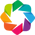

:Sankey   [procedencia_departamento,destino_ciudad_mercado]   (cantidad_kg)

In [ ]:
df_sankey = df[['procedencia_departamento', 'grupo', 'cantidad_kg', 'destino_ciudad_mercado']]
df_sankey
df_sankey_grouped = df_sankey.groupby(by=["procedencia_departamento","grupo", 'destino_ciudad_mercado']).sum()[["cantidad_kg"]]
df_sankey_grouped = df_sankey_grouped.reset_index()
df_sankey_grouped

df_sankey_grouped = df_sankey_grouped[df_sankey_grouped['grupo']=='FRUTAS']

import holoviews as hv
import plotly.graph_objects as go
import plotly.express as pex
hv.extension('bokeh')

# hv.Sankey(df_sankey_grouped)

sankey1 = hv.Sankey(df_sankey_grouped, kdims=["procedencia_departamento", 'destino_ciudad_mercado'], vdims=["cantidad_kg"])

sankey1.opts(cmap='Colorblind',label_position='left',
                                 edge_color='destino_ciudad_mercado', edge_line_width=0,
                                 node_alpha=1.0, node_width=40, node_sort=True,
                                 width=1000, height=1200, bgcolor="snow",
                                 title="PROCEDENCIA Y DESTINO DE FRUTAS")

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
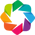

:Sankey   [procedencia_departamento,grupo]   (cantidad_kg)

In [ ]:
df_sankey = df[['procedencia_departamento', 'grupo', 'cantidad_kg', 'destino_ciudad_mercado']]
df_sankey
df_sankey_grouped = df_sankey.groupby(by=["procedencia_departamento","grupo", 'destino_ciudad_mercado']).sum()[["cantidad_kg"]]
df_sankey_grouped = df_sankey_grouped.reset_index()
df_sankey_grouped

df_sankey_grouped = df_sankey_grouped[df_sankey_grouped['destino_ciudad_mercado']=='Cali, Santa Helena']

import holoviews as hv
import plotly.graph_objects as go
import plotly.express as pex
hv.extension('bokeh')

# hv.Sankey(df_sankey_grouped)

sankey1 = hv.Sankey(df_sankey_grouped, kdims=["procedencia_departamento", 'grupo'], vdims=["cantidad_kg"])

sankey1.opts(cmap='Colorblind',label_position='left',
                                 edge_color='grupo', edge_line_width=0,
                                 node_alpha=1.0, node_width=40, node_sort=True,
                                 width=1000, height=1200, bgcolor="snow",
                                 title="QUIENES Y QUE PROVEEN A Santa Helena Cali")

In [ ]:
df

In [ ]:
df_time = df.groupby(by=['grupo','year', 'month']).sum()[["cantidad_kg"]]
df_time
sns.barplot(x='month', y='cantidad_kg', data=df_time)

NameError: ignored